<a href="https://colab.research.google.com/github/WhiteFox-Lugh/Pratice-TextAnalysis/blob/master/exercise2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# nltkの文書群にgensimのLDAを適用してみる

## 準備

必要ライブラリ(全部pipで入ります)
 * nltk
 * gensim
 * pyLDAvis

In [151]:
!pip install nltk
!pip install gensim
!pip install pyLDAvis

In [152]:
#nltk使ったことない人は、pip install してから対話環境等で以下のdataset等をダウンロードしてください
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("reuters")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## データロード・前処理

In [153]:
#dataset読み込み
from nltk.corpus import reuters as corpus

In [154]:
#全document数
len(corpus.fileids())

10788

### 前から k 文書とってくる

In [193]:
k = 1000
docs = [corpus.words(fileid) for fileid in corpus.fileids()[:k]]
tag_arr = corpus.fileids()[:k]
# print(tag_arr)

## 前処理 

In [194]:
#ストップワードリストの作成

# nltkのストップワードリストと記号を除去
en_stop = nltk.corpus.stopwords.words('english')
en_stop= [",\"", "``","/",",.",".,",";","--",":",")","(",'"','&',"'",'),',',"','-','.,','.,"','.-',"?",">","<", ">."] + ["would","said","say","u","v","mln","ct","net","dlrs","tonne","pct","shr","nil","company","lt","share","year","billion","price"] + en_stop

In [195]:
from nltk.corpus import wordnet as wn #lemmatize関数のためのimport

def preprocess_word(word, stopwordset):
    
    #1.make words lower ex: Python =>python
    word=word.lower()

    #2. remove number
    try:
      word = int(word)
      return None
    except:
      pass
    
    #3.remove "," and "."
    if word in [",","."]:
        return None
    
    #4.remove stopword  ex: the => (None) 
    if word in stopwordset:
        return None
    
    #5.lemmatize  ex: cooked=>cook
    lemma = wn.morphy(word)
    if lemma is None:
        return word

    elif lemma in stopwordset: #lemmatizeしたものがstopwordである可能性がある
        return None
    else:
        return lemma
    

def preprocess_document(document):
    document=[preprocess_word(w, en_stop) for w in document]
    document=[w for w in document if w is not None]
    return document

def preprocess_documents(documents):
    return [preprocess_document(document) for document in documents]

In [196]:
#before
print(docs[1][:100]) 

#after
print(preprocess_documents(docs)[1][:100])

['CHINA', 'DAILY', 'SAYS', 'VERMIN', 'EAT', '7', '-', '12', 'PCT', 'GRAIN', 'STOCKS', 'A', 'survey', 'of', '19', 'provinces', 'and', 'seven', 'cities', 'showed', 'vermin', 'consume', 'between', 'seven', 'and', '12', 'pct', 'of', 'China', "'", 's', 'grain', 'stocks', ',', 'the', 'China', 'Daily', 'said', '.', 'It', 'also', 'said', 'that', 'each', 'year', '1', '.', '575', 'mln', 'tonnes', ',', 'or', '25', 'pct', ',', 'of', 'China', "'", 's', 'fruit', 'output', 'are', 'left', 'to', 'rot', ',', 'and', '2', '.', '1', 'mln', 'tonnes', ',', 'or', 'up', 'to', '30', 'pct', ',', 'of', 'its', 'vegetables', '.', 'The', 'paper', 'blamed', 'the', 'waste', 'on', 'inadequate', 'storage', 'and', 'bad', 'preservation', 'methods', '.', 'It', 'said', 'the', 'government']
['china', 'daily', 'vermin', 'eat', 'grain', 'stocks', 'survey', 'province', 'seven', 'city', 'show', 'vermin', 'consume', 'seven', 'china', 'grain', 'stocks', 'china', 'daily', 'also', 'china', 'fruit', 'output', 'left', 'rot', 'vegetabl

## LDA準備

In [197]:
import gensim
from gensim import corpora

In [198]:
#documentを，gensim LDAが読み込めるデータ構造にする

#辞書の作成
dictionary = corpora.Dictionary(preprocess_documents(docs))
#コーパスの作成
corpus_ = [dictionary.doc2bow(doc) for doc in preprocess_documents(docs)]

In [199]:
#Dictionary:gensimにおける辞書クラス
#token2id属性には単語と辞書IDとの対応が格納される

print(dictionary.token2id)

{'able': 0, 'accounting': 1, 'action': 2, 'advantage': 3, 'allege': 4, 'allow': 5, 'also': 6, 'american': 7, 'among': 8, 'analyst': 9, 'april': 10, 'asia': 11, 'asian': 12, 'ask': 13, 'association': 14, 'australia': 15, 'australian': 16, 'avow': 17, 'await': 18, 'aware': 19, 'barrier': 20, 'beef': 21, 'beyond': 22, 'big': 23, 'block': 24, 'boost': 25, 'broker': 26, 'budget': 27, 'business': 28, 'businessmen': 29, 'button': 30, 'call': 31, 'canberra': 32, 'capel': 33, 'capital': 34, 'centre': 35, 'chairman': 36, 'chief': 37, 'co': 38, 'coal': 39, 'commercial': 40, 'complete': 41, 'concern': 42, 'conflict': 43, 'continue': 44, 'correspondent': 45, 'cost': 46, 'could': 47, 'country': 48, 'curb': 49, 'cut': 50, 'damage': 51, 'day': 52, 'defuse': 53, 'democratic': 54, 'deputy': 55, 'despite': 56, 'deterioration': 57, 'diplomatic': 58, 'director': 59, 'disadvantage': 60, 'dispute': 61, 'domestically': 62, 'due': 63, 'economic': 64, 'economy': 65, 'effort': 66, 'electric': 67, 'electronics': 

In [200]:
#corpusにはdocumentごとに単語の(ID、出現回数)のリストが得られる

print(corpus_[0][:10]) #文章での出現順でなく辞書IDの若い順なことに注意

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2), (6, 4), (7, 1), (8, 2), (9, 1)]


In [201]:
#before
print([w.lower() for w in corpus.sents(corpus.fileids()[0])[0]])

#after
print(dictionary.doc2bow([w.lower() for w in corpus.sents(corpus.fileids()[0])[0]]))

#これを全文書の全文に適用したのがcorpus_

['asian', 'exporters', 'fear', 'damage', 'from', 'u', '.', 's', '.-', 'japan', 'rift', 'mounting', 'trade', 'friction', 'between', 'the', 'u', '.', 's', '.', 'and', 'japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.']
[(8, 1), (11, 1), (12, 1), (29, 1), (47, 1), (51, 2), (64, 1), (77, 1), (80, 1), (81, 1), (88, 1), (108, 1), (112, 2), (134, 1), (149, 1), (190, 1), (201, 1), (202, 1), (248, 1)]


## LDA学習

In [202]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus_,
                                           num_topics=10,
                                           id2word=dictionary,
                                           alpha=0.1,                             #optional LDAのハイパーパラメータalpha
                                           eta=0.1,                                 #optional LDAのハイパーパラメータbeta
                                           #minimum_probability=0.0    #optional 学習結果に格納するトピック・単語の生起確率の下限
                                          )

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

## パラメータの確認

In [203]:
#(トピックID, 当該トピックにおける単語とそのprobability)  ※　のうち、上位num_words位 

topics = ldamodel.print_topics(num_words=15)
#for topic in topics:
#    print(topic)

In [204]:
#[(当該documentにおけるトピックIDとそのprobability　)]　 ※　のうち、minimum_probabilityの値を超えるもの

for n,item in enumerate(corpus_[:10]):
    print("document ID "+str(n)+":" ,end="")
    print(ldamodel.get_document_topics(item))

document ID 0:[(2, 0.32901895), (8, 0.17412436), (9, 0.4951019)]
document ID 1:[(0, 0.98268694)]
document ID 2:[(7, 0.99134433)]
document ID 3:[(6, 0.988747)]
document ID 4:[(0, 0.055332713), (4, 0.26215822), (7, 0.2632096), (8, 0.41263127)]
document ID 5:[(5, 0.71504027), (7, 0.27775097)]
document ID 6:[(4, 0.75650346), (6, 0.22214493), (9, 0.018239679)]
document ID 7:[(2, 0.96665955)]
document ID 8:[(3, 0.07048378), (5, 0.1062722), (8, 0.8119512)]
document ID 9:[(3, 0.532632), (6, 0.46516967)]


In [205]:
#documentのcategory
categories=[corpus.categories(fileid) for fileid in corpus.fileids()]

In [206]:
n=0

#n番目のdocumentのトピック分布
print(ldamodel.get_document_topics(corpus_[n]))

#n番目のdocumentのcategory
print(categories[n])

#n番目のdocumentの生の文章
print(" ".join(docs[n]))

[(2, 0.33121723), (8, 0.17214094), (9, 0.49488708)]
['trade']
ASIAN EXPORTERS FEAR DAMAGE FROM U . S .- JAPAN RIFT Mounting trade friction between the U . S . And Japan has raised fears among many of Asia ' s exporting nations that the row could inflict far - reaching economic damage , businessmen and officials said . They told Reuter correspondents in Asian capitals a U . S . Move against Japan might boost protectionist sentiment in the U . S . And lead to curbs on American imports of their products . But some exporters said that while the conflict would hurt them in the long - run , in the short - term Tokyo ' s loss might be their gain . The U . S . Has said it will impose 300 mln dlrs of tariffs on imports of Japanese electronics goods on April 17 , in retaliation for Japan ' s alleged failure to stick to a pact not to sell semiconductors on world markets at below cost . Unofficial Japanese estimates put the impact of the tariffs at 10 billion dlrs and spokesmen for major electroni

## 可視化

In [207]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [208]:
#全documentを学習に用いた場合結構時間がかかる(20min~)
#gensimではK個のトピックに0~K-1のidが割り振られていたのに対し，pyLDAvisでは1~Kのidが割り振られていることに注意

lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus_, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [209]:
#上で可視化したモデルをgoogle drive上にsaveできる

pyLDAvis.save_html(lda_display,'vis'+str(k)+'.html')

In [210]:
!ls

sample_data  vis10000.html  vis1000.html  vis100.html


10


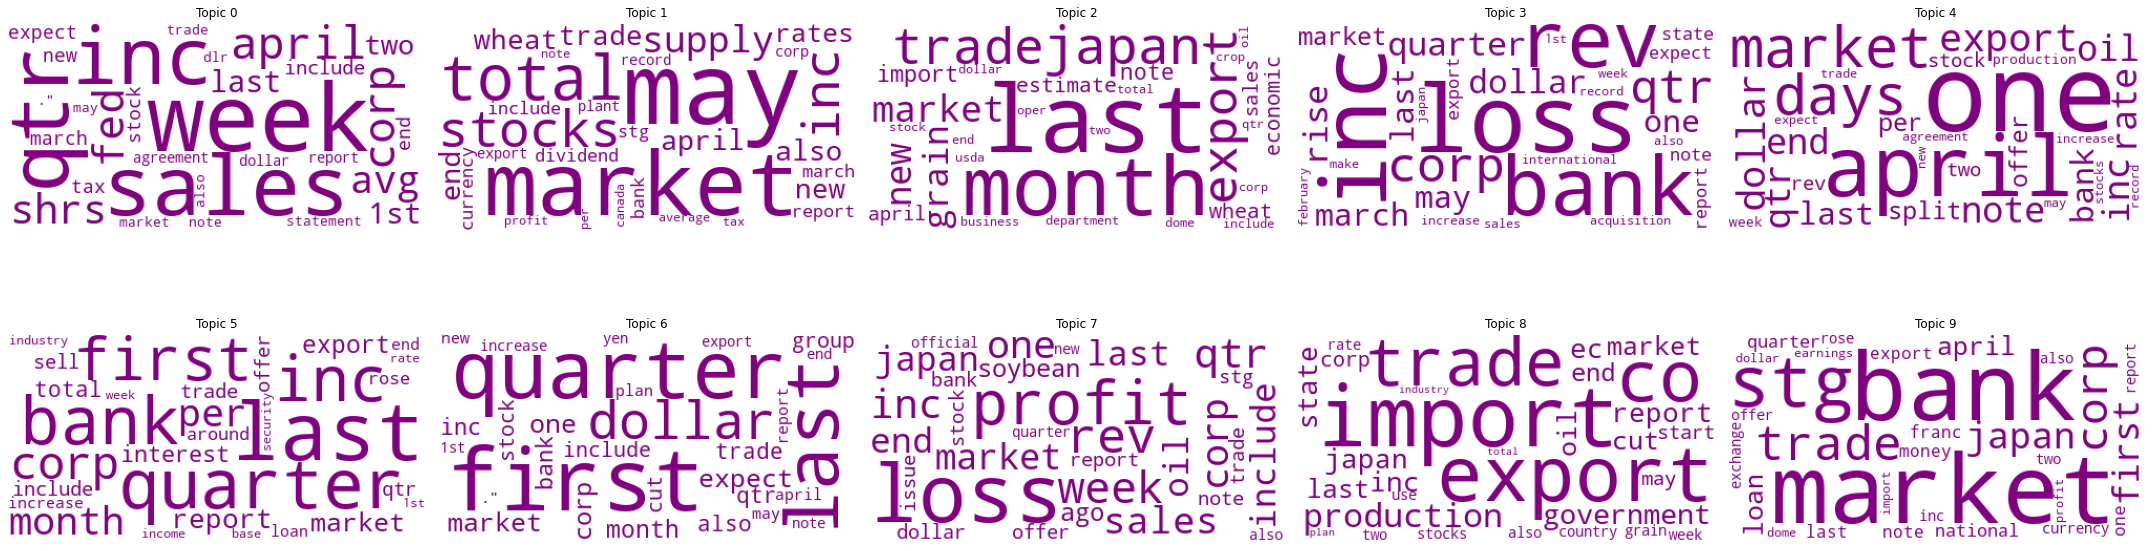

In [211]:
import matplotlib
import matplotlib.pylab as plt
import numpy as np
from wordcloud import WordCloud
from PIL import Image

topics = ldamodel.num_topics
cols = 5
rows = int(topics / cols)
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(30,10))
axs = axs.flatten()
 
def color_func(word, font_size, position, orientation, random_state, font_path):
    return 'purple'

print(ldamodel.num_topics)
for i, t in enumerate(range(ldamodel.num_topics)):
 
    x = dict(ldamodel.show_topic(t, 30))
    im = WordCloud(background_color='white',
                   color_func=color_func,
                   random_state=0).generate_from_frequencies(x)
    axs[i].imshow(im)
    axs[i].axis('off')
    axs[i].set_title('Topic '+str(t))
        
plt.tight_layout()
plt.show()